# DBScan Algorithm
#### By: Adirtha Borgohain and Garg Acharya Dutta

In [1]:
## Importing necessary libraries and functions
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform
# from sklearn.preprocessing import StandardScaler

In [2]:
## Importing the dataset and storing it in a list
data = pd.read_csv('t4.8k.csv', header = None).values
# data = StandardScaler().fit_transform(data)

## Finding total no. of points
n = len(data)

## Cluster labels for each point
cluster = [-1] * n

In [3]:
## Parameters for DBScan Algorithm
eps = 8.5
min_pts = 16.5

In [4]:
## Define a value for NOISE
def NOISE():
    return -1000

## Function to determine the neighbourhood of a point
def regionQuery(point, eps):
    neighbors = []
    for i in range(n):
        if np.linalg.norm(data[point] - data[i]) <= eps:
            neighbors.append(i)
    return neighbors


## Function for expanding cluster of a point
def expandCluster(data, point, clusterID, eps, min_pts):
    seeds = regionQuery(point, eps)
    
    if len(seeds) < min_pts:
        cluster[point] = NOISE()
        return False 
    else:
        for i in seeds:
            cluster[i] = clusterID
        seeds.remove(point)
        while(len(seeds) != 0):
            currentPoint = seeds[0]
            result = regionQuery(currentPoint, eps)
            result_size = len(result)
            if result_size >= min_pts:
                for i in range(result_size):
                    resultPoint = result[i]
                    if cluster[resultPoint] == -1 or cluster[resultPoint] == NOISE(): ####
                        if(cluster[resultPoint] == -1):
                            seeds.append(resultPoint)
                        cluster[resultPoint] = clusterID
            seeds.remove(currentPoint)
        return True

In [5]:
## Function for running DBScan
def DBScanFunc(data, eps, min_pts):
    clusterID = 0
    for point in range(n):
        if cluster[point] == -1:
            if(expandCluster(data, point, clusterID, eps, min_pts)):
                clusterID += 1          

In [6]:
## Calling DBScan Function
DBScanFunc(data, eps, min_pts)

## Visualization

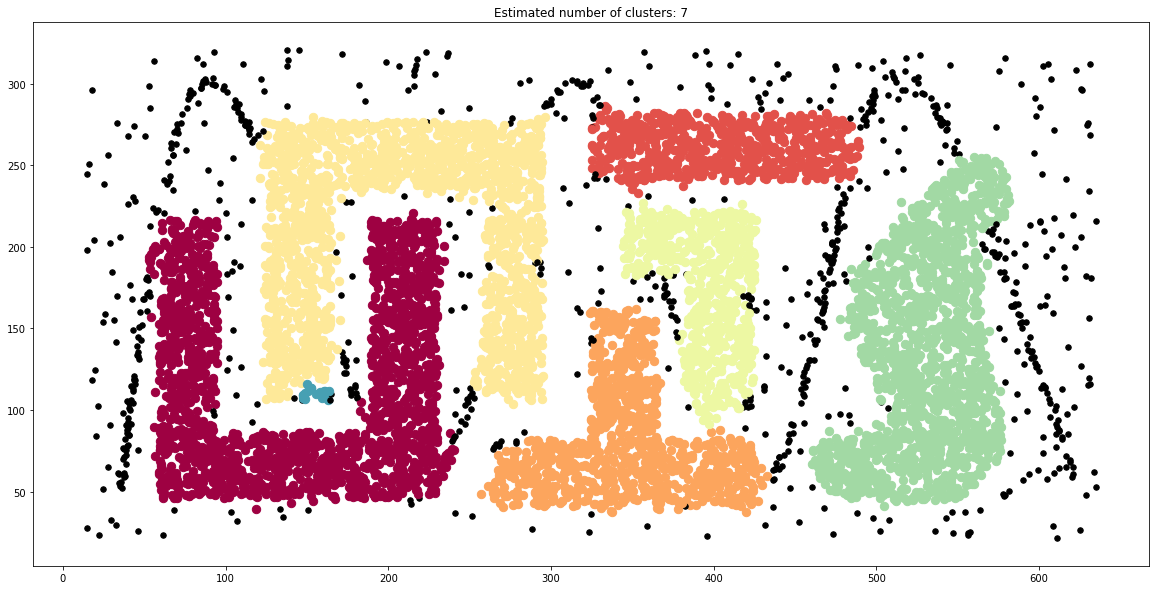

In [7]:
## Visualizing the results through matplotlib
unique_labels = set(cluster)
no_of_clusters = len(unique_labels) - 1
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(20,10))

for i in range(n):
    clus_no = cluster[i]
    if clus_no == NOISE():
        plt.scatter(data[i][0],data[i][1], c='k', s=30)
        continue
    plt.scatter(data[i][0],data[i][1],c=[colors[clus_no]], s=70)
    
plt.title('Estimated number of clusters: %d' % no_of_clusters)
plt.show()

##### Comparing the results with DBScan from sklearn library 

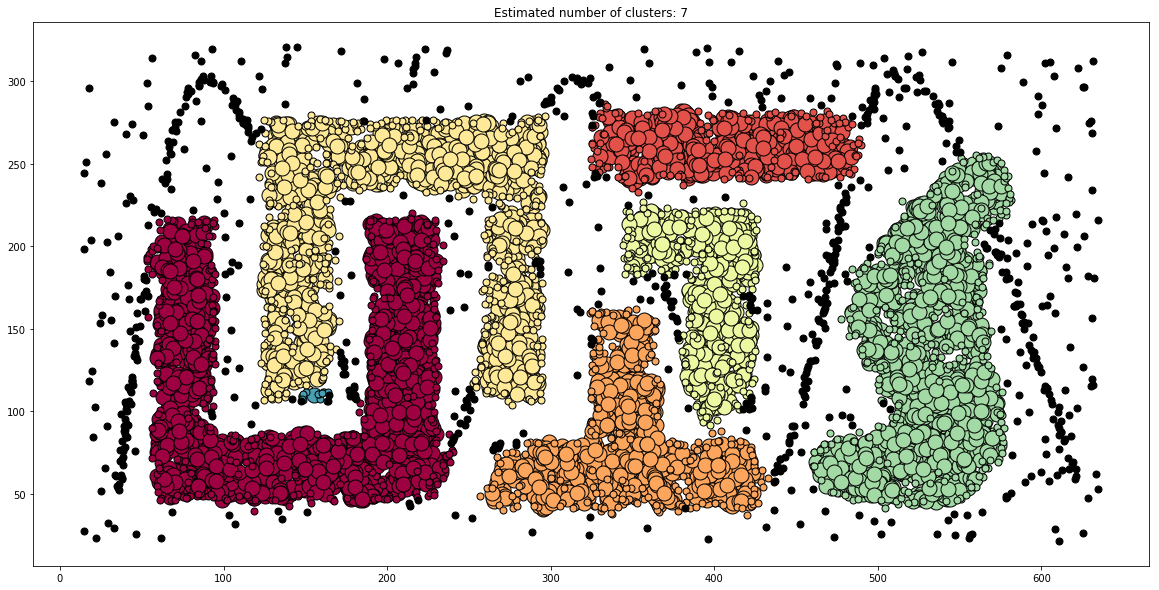

In [8]:
## DBScan implementation from sklearn documentation
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=eps, min_samples=min_pts).fit(data)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(20,10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=15)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Finding Homogeneity and Separation

In [9]:
## Creating a dictionary with clusterIDs as keys and its corresponding points as values
cluster_dict = {}
for i in range(n):
    if(cluster[i] != NOISE()):
        cluster_dict.setdefault(cluster[i],[]).append(i)

In [10]:
## Computing Average Homogeneity
similarity_sum = 0
cluster_order = []
centroid_array = []

for clusterID in cluster_dict:
    cluster_order.append(clusterID)
    sum_x = 0
    sum_y = 0
    for point in cluster_dict.get(clusterID):
        sum_x += data[point][0]
        sum_y += data[point][1]
    x_mean = sum_x/len(cluster_dict.get(clusterID))
    y_mean = sum_y/len(cluster_dict.get(clusterID))
    centroid = [x_mean, y_mean]
    centroid_array.append(centroid)
    for point in cluster_dict.get(clusterID):
        similarity_sum += np.linalg.norm(centroid-data[point])
#     homogeneity.append(similarity/len(cluster_dict.get(clusterID)))

homogeneity_avg = similarity_sum/n

In [11]:
centroid_array = np.array(centroid_array)
separation2_matrix = squareform(pdist(centroid_array, 'euclidean'))

In [12]:
## Computing Average Separation
separation_sum = 0
cluster_sum = 0

for (i,j), value in np.ndenumerate(separation2_matrix):
    if(i != j):
        C1 = cluster_order[i]
        C2 = cluster_order[j]
        separation_sum += len(cluster_dict.get(C1)) * len(cluster_dict.get(C2)) * value
        cluster_sum += len(cluster_dict.get(C1)) * len(cluster_dict.get(C2))
separation_sum /= 2
cluster_sum /= 2

separation_avg = separation_sum/cluster_sum

In [13]:
print("Average Homogeneity of the dataset:", homogeneity_avg)
print("Average Separation of the dataset:", separation_avg)

Average Homogeneity of the dataset: 55.891809747093234
Average Separation of the dataset: 223.71212225231747
